In [4]:
library(ggplot2)
library("DESeq2")
library(tibble)
library(ggpubr)
library(ggsci)
require("ggrepel")
library(tidyverse)
library(ggExtra)
library("ggsci")

,Genotype,PC1,PC2,PC3
,<chr>,<dbl>,<dbl>,<dbl>
1,1538,-123.04655,466.38845,102.03131
2,2369,-551.46879,-44.39816,98.40681
3,2MA22,157.53634,-111.42452,63.93501
4,33-16,101.88121,-48.17244,-131.40402
5,3IJI1,201.92035,794.29304,96.07402
6,4226,88.75105,-28.67540,-184.92315


,Genotype,Group
,<fct>,<fct>
1,B73,stiff_stalk
2,1538,iodent
3,2369,stiff_stalk
4,29MIBZ2,iodent
5,2FACC,stiff_stalk
6,2FADB,stiff_stalk


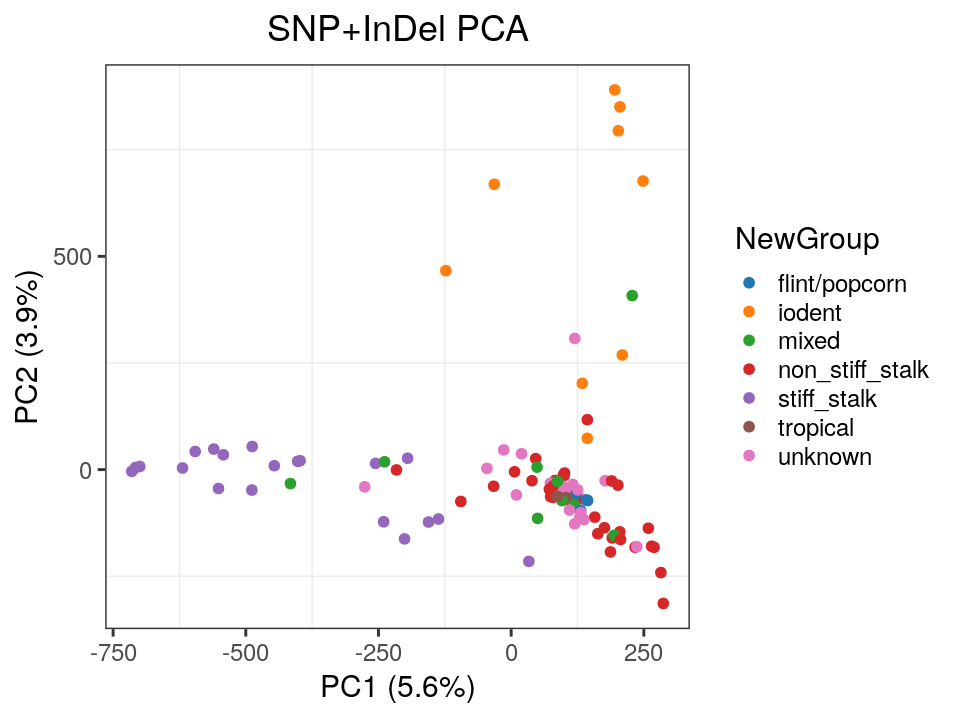

In [5]:
#PCA plotting using the variant data for genotypes employed in this study
mydata = read.table("PCAplot/Selected-102genos-Widiv-filtered-MAF01-Het01-SNP+InDel-PCA.txt",sep=' ',head=T, check.names = FALSE)
mypc = mydata %>% rownames_to_column(var="Genotype") %>% select(Genotype, PC1, PC2, PC3)
head(mypc)
widiv = read.table("PCAplot/Widiv-Class-information.txt")
colnames(widiv) = c("Genotype","Group")
head(widiv)
combine = mypc %>% left_join(widiv, by="Genotype") %>% mutate(NewGroup = ifelse(Group == 'sweet_corn', 'unknown', as.character(Group)))
options(repr.plot.width=8, repr.plot.height=6)
x = ggscatter(combine, x = "PC1", y = "PC2", color="NewGroup", size=2.6)+theme_bw(base_size = 18) + ggtitle("PCA using variant") + scale_color_d3()+
    theme(panel.grid.major=element_blank(),plot.title = element_text(hjust = 0.5)) + xlab("PC1 (5.6%)") + ylab("PC2 (3.9%)")
x

,Rep,Temp,ID,Block,FvFm,Y.II.a,Y.II.b,Y.II.c,Y.II.d,Y.II.e,⋯,NPQd,NPQe,NPQf,Y.NO.a,Y.NO.b,Y.NO.c,Y.NO.d,Y.NO.e,Y.NO.f,myid
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,a,Control,1,B1,0.773,0.063,0.160,0.231,0.590,0.602,⋯,0.156,0.139,0.138,0.555,0.308,0.274,0.254,0.259,0.254,0
2,b,Control,1,B1,0.765,0.114,0.185,0.253,0.607,0.617,⋯,0.119,0.107,0.111,0.577,0.374,0.316,0.274,0.276,0.271,0
3,c,Control,1,B1,0.759,0.133,0.167,0.192,0.605,0.625,⋯,0.108,0.097,0.101,0.543,0.372,0.307,0.287,0.278,0.263,0
4,a,Control,2,B1,0.765,0.000,0.034,0.105,0.593,0.604,⋯,0.152,0.132,0.125,0.592,0.311,0.272,0.255,0.264,0.266,0
5,b,Control,2,B1,0.757,0.026,0.032,0.067,0.604,0.608,⋯,0.101,0.090,0.085,0.641,0.389,0.301,0.295,0.302,0.302,0
6,c,Control,2,B1,0.766,0.040,0.044,0.085,0.604,0.616,⋯,0.140,0.120,0.107,0.487,0.296,0.254,0.256,0.264,0.256,0


,Rep,Temp,ID,Block,FvFm,Y.II.a,Y.II.b,Y.II.c,Y.II.d,Y.II.e,⋯,NPQd,NPQe,NPQf,Y.NO.a,Y.NO.b,Y.NO.c,Y.NO.d,Y.NO.e,Y.NO.f,myid
,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,a,Control,1,B1,0.773,0.063,0.160,0.231,0.590,0.602,⋯,0.156,0.139,0.138,0.555,0.308,0.274,0.254,0.259,0.254,0
2,b,Control,1,B1,0.765,0.114,0.185,0.253,0.607,0.617,⋯,0.119,0.107,0.111,0.577,0.374,0.316,0.274,0.276,0.271,0
3,c,Control,1,B1,0.759,0.133,0.167,0.192,0.605,0.625,⋯,0.108,0.097,0.101,0.543,0.372,0.307,0.287,0.278,0.263,0
4,a,Control,2,B1,0.765,0.000,0.034,0.105,0.593,0.604,⋯,0.152,0.132,0.125,0.592,0.311,0.272,0.255,0.264,0.266,0
5,b,Control,2,B1,0.757,0.026,0.032,0.067,0.604,0.608,⋯,0.101,0.090,0.085,0.641,0.389,0.301,0.295,0.302,0.302,0
6,c,Control,2,B1,0.766,0.040,0.044,0.085,0.604,0.616,⋯,0.140,0.120,0.107,0.487,0.296,0.254,0.256,0.264,0.256,0


Warning message:
“Removed 12 rows containing non-finite values (stat_ellipse).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing non-finite values (stat_ellipse).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”
Warning message:
“Removed 12 rows containing non-finite values (stat_ellipse).”
Warning message:
“Removed 12 rows containing missing values (geom_point).”


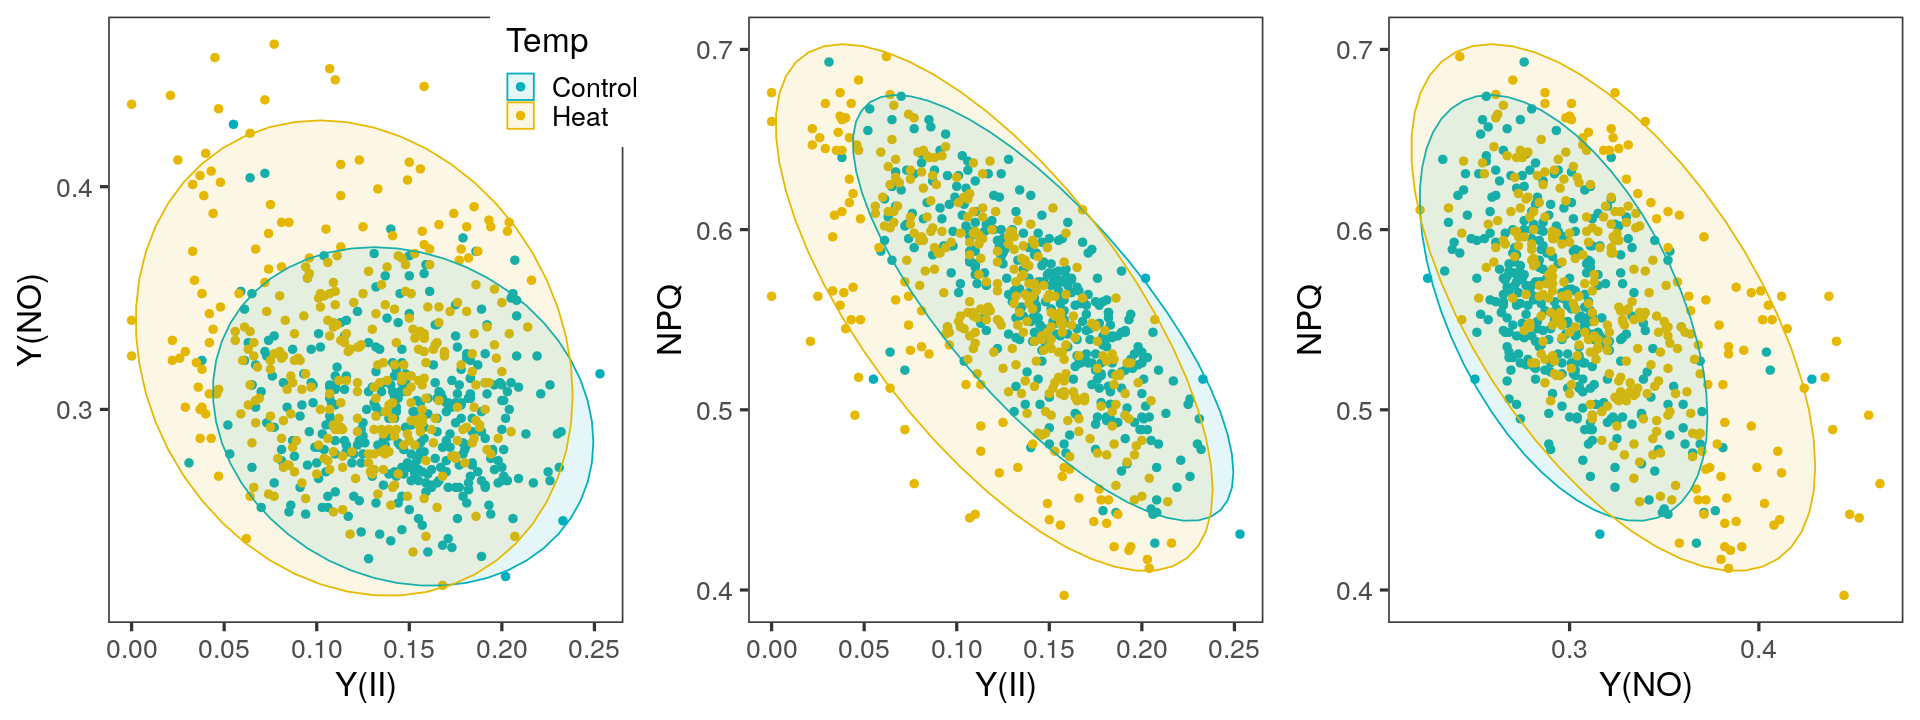

In [3]:
# segregation of raw phenotype values between conditions

data = read.table("2021JunEntireAnalysis/Phenotype/10-11-phenotype-corrected-addNO.csv",sep=',',head=T)
data1 = data %>% filter(!ID %in% c('B','W','M','O','reference')) %>% mutate(myid = ifelse(Temp == 'Control', 0, 1))
head(data1)

colors <- c("#999999", "#E69F00")
colors <- colors[as.numeric(data1$myid)]
head(data1)
x1 = ggscatter(data1, "Y.II.c", "Y.NO.c", color="Temp",palette = c("#00AFBB", "#E7B800"),
          ellipse = TRUE) + xlab("Y(II)") + ylab("Y(NO)") + theme_bw(base_size = 20) + theme(legend.position = c(0.9, 0.9)) + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),plot.title = element_text(hjust = 0.5))
x2 = ggscatter(data1, "Y.II.c", "NPQc", color="Temp",palette = c("#00AFBB", "#E7B800"),
          ellipse = TRUE) + xlab("Y(II)") + ylab("NPQ") + theme_bw(base_size = 20) + theme(legend.position = "none") + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),plot.title = element_text(hjust = 0.5))
x3 = ggscatter(data1, "Y.NO.c", "NPQc", color="Temp",palette = c("#00AFBB", "#E7B800"),
          ellipse = TRUE) + xlab("Y(NO)") + ylab("NPQ") +theme_bw(base_size = 20) + theme(legend.position = "none") + 
    theme(panel.grid.major=element_blank(),panel.grid.minor=element_blank(),plot.title = element_text(hjust = 0.5))
options(repr.plot.width=16, repr.plot.height=6)
ggarrange(x1,x2,x3,ncol=3)